In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix
import seaborn as sns

2024-09-30 10:44:58.950957: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-30 10:44:58.951734: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 10:44:58.956485: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-30 10:44:58.966649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 10:44:58.983948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
#Load Data
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

# shape of our dataset.
print("XTrain shape = ", XTrain.shape)
print("XTest shape = ", XTest.shape)
print("YTrain shape = ", YTrain.shape)
print("YTest shape = ", YTest.shape)

# Data normalization.
XTrain = XTrain.astype("float32") / 255
XTest = XTest.astype("float32") / 255

# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print(XTrain.shape)
print(XTest.shape)

XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
(60000, 784)
(10000, 784)


In [3]:
# Stacked AutoEncoder : 784 -> 256 -> 128 -> 64 -> 128-> 256 -> 784
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(256, activation="relu")(input_img)
encoded = layers.Dense(128, activation="relu")(encoded)
encoded = layers.Dense(64, activation="relu")(encoded)

decoded = layers.Dense(128, activation="relu")(encoded)
decoded = layers.Dense(256, activation="relu")(decoded)
decoded = layers.Dense(784, activation="sigmoid")(decoded)

stacked_autoencoder = Model(input_img, decoded)
stacked_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

stacked_autoencoder.fit(
    XTrain,
    XTrain,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(XTrain, XTrain),
)
stacked_encoder = Model(input_img, encoded)

I0000 00:00:1727673301.041681   41515 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-30 10:45:01.042003: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3069 - val_loss: 0.1425
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1333 - val_loss: 0.1154
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1128 - val_loss: 0.1052
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1036 - val_loss: 0.0992
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0979 - val_loss: 0.0949
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0940 - val_loss: 0.0923
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0915 - val_loss: 0.0901
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0896 - val_loss: 0.0886
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0879 - val_loss: 0.0868
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0868 - val_loss: 0.0860
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0856 - val_loss: 0.0847
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [4]:
encoded_out = stacked_encoder.predict(XTrain)

# Classifier : 64 -> 10
classifier = Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=encoded_out.shape[1:]),
        layers.Dense(10, activation="softmax"),
    ]
)

classifier.compile(optimizer="adam", loss="binary_crossentropy")
classifier.fit(
    encoded_out,
    # One Hot encoding
    tf.keras.utils.to_categorical(YTrain, 10),
    epochs=20,
    batch_size=256,
    shuffle=True,
)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step
Epoch 1/20


/home/aaditya/Notes/EC-453/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4214
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.1136
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0879
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0772
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.0722
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0669
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0621
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0599
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0574
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0540
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.0527
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0493
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0484
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0467
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


Text(0.5, 69.7222222222222, 'Predicted Label')

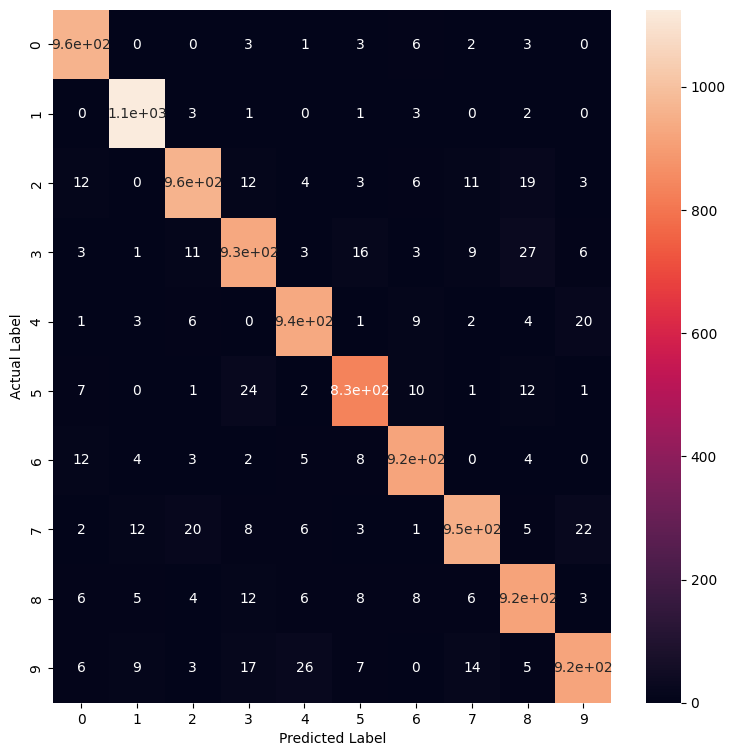

In [5]:
# Pipeline for predicting : Image -> Stacked_AutoEncoder -> classifier
image = XTest
enc_img = stacked_encoder.predict(image)
predictions = np.argmax(classifier.predict(enc_img), axis=1)

# Confusion Matrix
cm = confusion_matrix(YTest, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')